In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# training set should be subject: 01 05 06 07 08 09
name = os.listdir('./Protocol')
name.pop(1)
name.pop(1)
name.pop(1)
name

['subject101.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

In [3]:
train = pd.DataFrame()
for i in name:
    data = pd.read_csv('./Protocol/'+i,sep = ' ', header= None)
    train = train.append(data,ignore_index=True)

In [4]:
# vali_set is subject: 03 04
# test set is subject: 02
vali_03 = pd.read_csv('./Protocol/subject103.dat',sep = ' ', header= None)
vali = vali_03.append(pd.read_csv('./Protocol/subject104.dat',sep = ' ', header= None))

test = pd.read_csv('./Protocol/subject102.dat',sep = ' ', header= None)

In [5]:
columns_name = ['timestamps','id','heart_rate']
for i in range(train.shape[1]-3):
    columns_name.append('F' +str(i+1))
print(columns_name)
train.columns = columns_name
vali.columns = columns_name
test.columns = columns_name

['timestamps', 'id', 'heart_rate', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51']


In [6]:
# only the wrist sensor (ACC, GYRO) and heart rate monitor will be used

train = train.drop(train.columns[20:],axis=1)
vali = vali.drop(vali.columns[20:],axis=1)
test = test.drop(test.columns[20:],axis=1)

train.describe()

,timestamps,id,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17
count,1.843124e+06,1.843124e+06,168262.000000,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06,1.835448e+06
mean,1.845589e+03,5.619941e+00,110.833896,3.303286e+01,-4.777386e+00,3.142993e+00,3.310900e+00,-4.692671e+00,3.125025e+00,3.515536e+00,-7.247221e-03,4.009560e-02,-1.305646e-03,2.109244e+01,-1.334530e+01,-2.231899e+01,6.166227e-01,-3.894153e-02,-1.195681e-01,-3.796232e-02
std,1.084843e+03,6.362583e+00,27.666623,1.737555e+00,6.184029e+00,7.303992e+00,3.747499e+00,6.177649e+00,7.002546e+00,3.724935e+00,1.217097e+00,8.692353e-01,1.475253e+00,2.574793e+01,2.680143e+01,2.085267e+01,3.061710e-01,3.642234e-01,3.145593e-01,5.264749e-01
min,5.700000e+00,0.000000e+00,60.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,-2.813540e+01,-2.221270e+01,-1.521850e+01,-1.039410e+02,-2.000430e+02,-4.976320e+02,-4.522460e-01,-9.989440e-01,-9.749160e-01,-9.993260e-01
25%,9.109600e+02,0.000000e+00,90.000000,3.218750e+01,-8.982972e+00,-1.790760e-01,1.046830e+00,-8.870062e+00,-2.106145e-01,1.265580e+00,-3.504477e-01,-1.945110e-01,-3.118152e-01,3.891940e+00,-3.174760e+01,-3.608900e+01,3.652980e-01,-3.114813e-01,-3.682142e-01,-5.202370e-01
50%,1.832520e+03,4.000000e+00,108.000000,3.350000e+01,-5.407975e+00,3.348380e+00,3.070090e+00,-5.306445e+00,3.390390e+00,3.276240e+00,-6.837770e-03,5.649770e-03,-5.393820e-03,2.471290e+01,-1.481510e+01,-2.181460e+01,6.511105e-01,0.000000e+00,-4.304770e-02,0.000000e+00
75%,2.754080e+03,7.000000e+00,128.000000,3.425000e+01,-1.844275e-01,6.705653e+00,5.998410e+00,-5.510495e-02,6.683900e+00,6.265072e+00,2.927610e-01,2.397285e-01,3.181573e-01,4.063310e+01,6.737355e+00,-9.045690e+00,9.079980e-01,2.107735e-01,4.983580e-02,3.722790e-01
max,4.086190e+03,2.400000e+01,202.000000,3.550000e+01,6.091260e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,2.641580e+01,2.307790e+01,1.433840e+01,1.725900e+02,1.211760e+02,1.839110e+02,1.000000e+00,9.993700e-01,9.764060e-01,9.996770e-01


In [7]:
train=train.interpolate()
vali=vali.interpolate()
test=test.interpolate()

In [8]:
# The activities of the protocol subset were grouped in 7 classes 
# (lie, sit, stand, (nordic-)walking, stair climbing, sport (run, cycle, rope jump), house work (vacuum, iron))
# first: all the id = 0 (other (transient activities)) will be deleted
index=[x for i,x in enumerate(train.index) if train.iat[i,1]==0]
train=train.drop(index,axis=0)

index_vali=[x for i,x in enumerate(vali.index) if vali.iat[i,1]==0]
vali=vali.drop(index_vali,axis=0)

index_test=[x for i,x in enumerate(test.index) if test.iat[i,1]==0]
test=test.drop(index_test,axis=0)

train.index = range(len(train))
vali.index = range(len(vali))
test.index = range(len(test))

In [9]:
train.iloc[:,1]

0           1
1           1
2           1
3           1
4           1
           ..
1273759    24
1273760    24
1273761    24
1273762    24
1273763    24
Name: id, Length: 1273764, dtype: int64

In [10]:
# then the activity id will be regrouped and renamed
# lying(1), sitting(2), standing(3) will remain the same
# Nordic_walking(7) and walking(4) will be regrouped as walking(4)
# ascending_stairs(12) and descending_stairs(13) will be regrouped as stair_climbing(5)
# running(5) cycling(6) and rope_jumping(24) will be regrouped as sport(6)
# vacuum_cleaning(16) and ironing(17) will be regrouped as house_work(7)

def regroupe(data):
    temp = np.array(data.iloc[:,1])
    temp[temp==7] = 4 
    
    temp[temp==5] = 6
    temp[temp==24] = 6
    
    temp[temp==12] = 5
    temp[temp==13] = 5
    
    temp[temp==16] = 7
    temp[temp==17] = 7
    data['id_n'] = temp
    return data

train = regroupe(train)

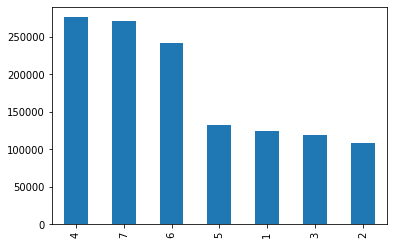

In [11]:
train['id_n'].value_counts().plot.bar()
plt.show()

In [12]:
vali = regroupe(vali)

vali['id_n'].value_counts().plot.bar()
plt.show()

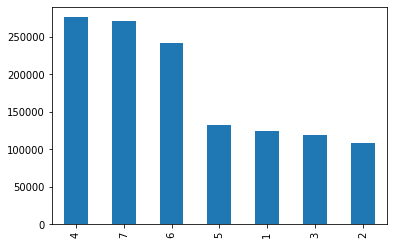

In [13]:
test = regroupe(test)

train['id_n'].value_counts().plot.bar()
plt.show()

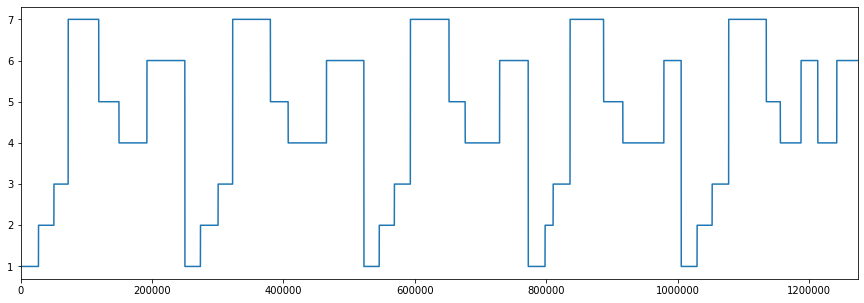

In [15]:
train['id_n'].plot(figsize = (15,5))

In [19]:
train = train.drop(columns=['id','timestamps'],axis=1)
vali = vali.drop(columns=['id','timestamps'],axis=1)
test = test.drop(columns=['id','timestamps'],axis=1)

In [20]:
train

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,id_n
0,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,1.000000,0.000000,0.000000,0.000000,1
1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,1.000000,0.000000,0.000000,0.000000,1
2,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,1.000000,0.000000,0.000000,0.000000,1
3,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,1.000000,0.000000,0.000000,0.000000,1
4,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273759,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,-0.289166,-0.110170,0.238570,-4.79353,-18.1271,-48.2695,0.823022,-0.256932,0.401650,0.308704,6
1273760,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,-0.275411,-0.128358,0.267409,-4.54101,-18.0169,-48.9268,0.823742,-0.255166,0.401881,0.307947,6
1273761,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,-0.289885,-0.126548,0.281483,-4.17401,-17.9121,-48.4032,0.824497,-0.253507,0.402103,0.307006,6
1273762,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,-0.234417,-0.101485,0.275497,-4.66091,-18.2588,-49.0563,0.824995,-0.252236,0.402400,0.306323,6


In [21]:
mean = train.iloc[:, :-1].mean()
std = train.iloc[:,:-1].std()
std.replace(0, 1, inplace=True)
train.iloc[:,:-1] = (train.iloc[:, :-1] - mean) / std
vali.iloc[:,:-1] = (vali.iloc[:, :-1] - mean) / std
test.iloc[:,:-1] = (test.iloc[:, :-1] - mean) / std

In [22]:
train.describe()

,heart_rate,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,id_n
count,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06,1.273764e+06
mean,-8.757865e-14,-4.297001e-13,-8.181833e-15,-4.290767e-15,6.889649e-14,-1.553561e-14,-2.600895e-14,6.254602e-15,-4.568987e-16,-2.767462e-15,-4.304831e-17,-3.244894e-15,-1.377315e-14,-4.333260e-15,-3.694334e-13,-4.662426e-14,-1.479547e-13,2.128813e-14,4.566672e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.941462e+00
min,-1.688026e+00,-4.806541e+00,-2.175247e+01,-1.340849e+01,-2.613608e+01,-8.762022e+00,-8.541123e+00,-1.648913e+01,-2.194320e+01,-1.901157e+01,-8.742523e+00,-4.825157e+00,-6.956768e+00,-6.790368e+00,-1.961352e+00,-2.755584e+00,-2.712190e+00,-1.714582e+00,1.000000e+00
25%,-7.466459e-01,-4.654241e-01,-6.318869e-01,-4.235058e-01,-6.120646e-01,-6.267451e-01,-4.412213e-01,-6.130495e-01,-2.993376e-01,-2.901568e-01,-2.507766e-01,-6.759795e-01,-6.841907e-01,-6.925958e-01,-8.433829e-01,-7.620076e-01,-7.761427e-01,-9.859738e-01,3.000000e+00
50%,-1.887911e-01,2.641755e-01,-3.599913e-02,1.340819e-02,-4.041656e-02,-3.124879e-02,2.297953e-02,-2.971913e-02,-2.490007e-03,-4.870676e-02,-5.030895e-03,8.347840e-02,-7.272633e-02,2.676527e-02,1.005118e-01,8.028062e-02,2.795406e-01,1.128762e-01,5.000000e+00
75%,6.131252e-01,7.384152e-01,6.823425e-01,4.149540e-01,7.294146e-01,6.911812e-01,4.400886e-01,7.474455e-01,2.588105e-01,2.352821e-01,2.485130e-01,7.898294e-01,7.521031e-01,6.366069e-01,9.444369e-01,6.597002e-01,6.072316e-01,7.920402e-01,6.000000e+00
max,3.262936e+00,1.395055e+00,1.016410e+01,1.900417e+01,3.835575e+01,8.918333e+00,7.748668e+00,1.457867e+01,2.060770e+01,2.445434e+01,8.784427e+00,4.525622e+00,4.573174e+00,6.121085e+00,1.290799e+00,2.917354e+00,3.350243e+00,1.940977e+00,7.000000e+00


In [26]:
test.shape[0]

263349

In [71]:
def batch_generator(training_data, sequence_length=15, window_size = 10):
    """
    Generator function for creating random batches of training-data for many to many models
    """
    for i in range(training_data.shape[0]):
        if training_data.iloc[i,1] == training_data.iloc[i+int((window_size+sequence_length-1)/2),1] == training_data.iloc[i+sequence_length+window_size,1]:
            
    
    
    for Batch in range (Batch_size):
        for seq in range(sequence_length):
            y_batch[Batch,seq] = temp_data[Batch*sequence_length+seq,-1,1]
            x_batch[Batch,seq] = temp_data[Batch*sequence_length+seq,:,2:]
    x_batch = np.expand_dims(x_batch, axis=4)
    y_batch = np.expand_dims(y_batch, axis=2)
    return x_batch, y_batch

In [72]:
sequence_length = 3
window_size = 20
kernel_size = 3

In [81]:
x_batch, y_batch= batch_generator(train_1,sequence_length=sequence_length, window_size=window_size)

In [82]:
x_batch

array([[[[[-0.8393323 ],
          [-1.9638379 ],
          [ 0.8988438 ],
          ...,
          [-0.40070748],
          [-1.1371855 ],
          [-2.3249767 ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.8699883 ],
          ...,
          [-0.34854296],
          [-1.1349638 ],
          [-2.3379047 ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.8990541 ],
          ...,
          [-0.38309628],
          [-1.1520152 ],
          [-2.333655  ]],

         ...,

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.91011703],
          ...,
          [-0.3787003 ],
          [-1.1451509 ],
          [-2.3168304 ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.86258686],
          ...,
          [-0.3481617 ],
          [-1.1601505 ],
          [-2.342381  ]],

         [[-0.8393323 ],
          [-1.9638379 ],
          [ 0.898045  ],
          ...,
          [-0.38750395],
          [-1.1377343 ],
          

In [87]:
xf =y_batch.mean()

In [89]:
y_batch = tf.keras.utils.to_categorical(y_batch)

In [95]:
y_batch.shape

(125466, 3, 25)

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv3D
#from tensorflow.keras.layers.convolutional_recurrent import ConvLSTM2D
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from ConvLSTM2D_2 import ConvLSTM2D_2

In [103]:
model =Sequential()
# input 的shape 应该是 （时间，行-window，列-sensor， channels）
# 参数个数怎么算？？？为啥改变filter个数，参数个数不是按比例增长
# 增加batch ？ 增加 dropout??
model.add(ConvLSTM2D_2(filters=10, kernel_size=(kernel_size, x_batch.shape[3]),input_shape=(None, window_size, x_batch.shape[3], 1), padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
model.add(ConvLSTM2D_2(filters=20, kernel_size=(kernel_size, 1),padding='valid', return_sequences=True))
model.add(keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Reshape((100,10)))
#model.add(self_attention())
#model.add(keras.layers.BatchNormalization())
model.add(TimeDistributed(Flatten()))
#model.add(Flatten())
model.add(TimeDistributed(Dense(units = 100, activation = "linear")))
model.add(tf.compat.v2.keras.layers.Dropout(0.4))
#model.add(TimeDistributed(Dense(units = 2, activation = "softmax")))
model.add(TimeDistributed(Dense(units = 25, activation = "softmax")))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [104]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2_4 (ConvLSTM2D (None, None, 16, 1, 10)   66100     
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 16, 1, 10)   40        
_________________________________________________________________
conv_lst_m2d_2_5 (ConvLSTM2D (None, None, 12, 1, 20)   18080     
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 12, 1, 20)   80        
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 240)         0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 100)         24100     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)        

In [105]:
model.fit(x_batch,y_batch, batch_size=15, epochs=30, validation_split=0.1)

Train on 112919 samples, validate on 12547 samples
Epoch 1/30
112919/112919 [==============================] - 184s 2ms/sample - loss: 0.4103 - categorical_accuracy: 0.8638 - val_loss: 5.4357 - val_categorical_accuracy: 0.6064
Epoch 2/30
112919/112919 [==============================] - 178s 2ms/sample - loss: 0.2226 - categorical_accuracy: 0.9254 - val_loss: 5.4879 - val_categorical_accuracy: 0.6082
Epoch 3/30
112919/112919 [==============================] - 183s 2ms/sample - loss: 0.1714 - categorical_accuracy: 0.9426 - val_loss: 5.6056 - val_categorical_accuracy: 0.5972
Epoch 4/30
112919/112919 [==============================] - 180s 2ms/sample - loss: 0.1427 - categorical_accuracy: 0.9528 - val_loss: 5.6899 - val_categorical_accuracy: 0.5940
Epoch 5/30
112919/112919 [==============================] - 178s 2ms/sample - loss: 0.1237 - categorical_accuracy: 0.9590 - val_loss: 5.7074 - val_categorical_accuracy: 0.6062
Epoch 6/30
112919/112919 [==============================] - 177s 2ms/

KeyboardInterrupt: 

In [117]:
from sklearn.model_selection import KFold

def cross_validate(model,x_batch,y_batch, split_size=10):
    results = []
    kf = KFold(n_splits=split_size)
    for train_idx, val_idx in kf.split(x_batch, y_batch):
        train_x = train_x_all[train_idx]
        train_y = train_y_all[train_idx]
        val_x = train_x_all[val_idx]
        val_y = train_y_all[val_idx]
        model.fit(train_x,train_y, batch_size=15, epochs=5, validation_split=0.1)
        results.append(session.run(accuracy, feed_dict={x: val_x, y: val_y}))
    return results

In [119]:
with tf.Session() as session:
  result = cross_validate(model,x_batch,y_batch)
  print( "Cross-validation result: %s" % result)
  print ("Test accuracy: %f" % session.run(accuracy, feed_dict={x: test_x, y: test_y}))

AttributeError: module 'tensorflow' has no attribute 'Session'